In [13]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *

In [14]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 6
filling_factor_inv = 2
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

N_phi= 9 flux quanta for N_e= 6 electrons


In [15]:
#initialization (system configurations and parameters)
system = system(N, Nphi,0,True)

========Initializing possible states in spherical geometry========
completed in 0.0016021728515625 seconds
N = 6 electrons
Nphi = 9 flux quanta

========Constructing total angular momentum matrix========
completed in 0.008606195449829102 seconds


In [16]:
#pseudopotentials

#trial pseudopotential according to Greiter et al
trial_pp=np.array([0,1,0,1])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(system.Q, LLn = 1,custom=trial_pp)

#Coulomb pseudopotentials
pp = haldane_pseudopotential(system.Q, LLn = 1)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 10.0 %
Working on interaction matrix: 20.0 %
Working on interaction matrix: 30.0 %
Working on interaction matrix: 40.0 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 60.0 %
Working on interaction matrix: 70.0 %
Working on interaction matrix: 80.0 %
Working on interaction matrix: 90.0 %
completed in  1.5989267826080322 seconds

========Initializing two-body pseudopotential========
completed in 0.03240489959716797 seconds
pseudopotential: [0.69882403 0.49436929 0.57597465 0.41035066 0.35353421 0.32211311
 0.30258393 0.29017715 0.282743   0.27924272]

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 10.0 %
Working on interaction matrix: 20.0 %
Working on interaction matrix: 30.0 %
Working on interaction matrix: 40.0 %
Working on interaction matrix: 50.0 %
Working on interaction matrix:

Text(0.5, 1.0, 'Haldane Pseudopotentials')

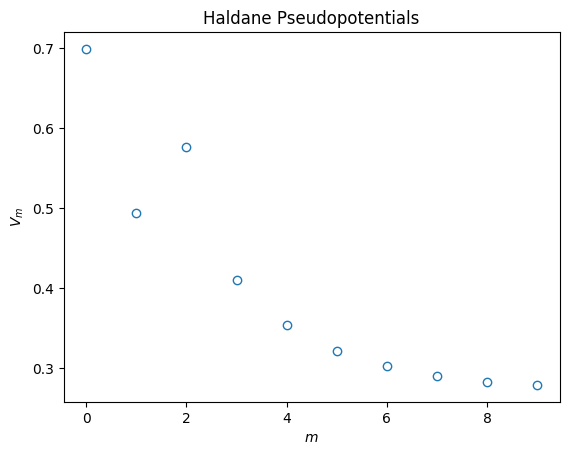

In [17]:
ax=plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')

In [18]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
energies, eigenstates=LA.eigh(hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 18 x 18 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in 0.02020883560180664 seconds
Energy s

Text(0, 0.5, '$E$')

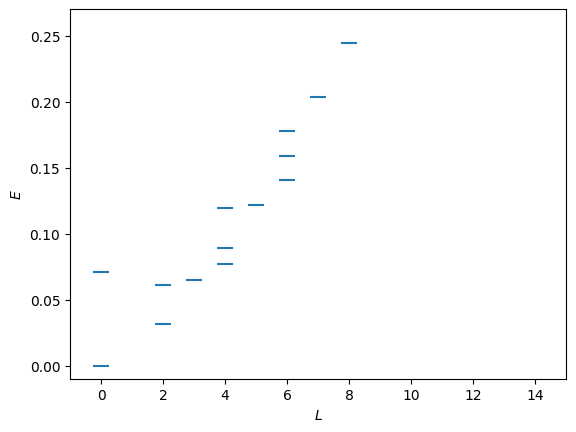

In [19]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(L, ene, ls="none", marker="_", ms="12", mew="1.5")
plt.xlim(-1, 15)
plt.ylim(-0.01, 0.27)
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

In [20]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,trial_hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 18 x 18 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in 0.01938486099243164 seconds
Energy s

Text(0, 0.5, '$E$')

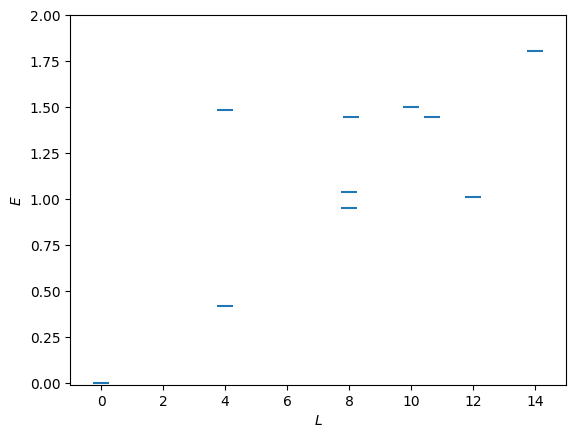

In [21]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(2*L, ene, ls="none", marker="_", ms="12", mew="1.5")
plt.xlim(-1, 15)
plt.ylim(-0.01,2)
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

In [22]:
overlap=overlap_Vectors(np.transpose(trial_eigenstates)[0],np.transpose(eigenstates)[0])

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9856922828033863
